In [12]:
!pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 1.9 MB/s eta 0:00:00a 0:00:01


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/rehnooraulakh/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1


In [3]:
import os

dataset_path = "/Users/rehnooraulakh/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1/data"

if os.path.exists(dataset_path):
  print("Dataset is Ready!!!")
  print("Files in dataset: ",os.listdir(dataset_path))



Dataset is Ready!!!
Files in dataset:  ['with_mask', 'without_mask']


Loading and Preprocessing Images using opencv   

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

categories=["with_mask","without_mask"]

data=[]
labels=[]

img_size=128

for category in categories:
  folder_path=os.path.join(dataset_path,category)

  if not os.path.exists(folder_path):
    print("Path does not exist")

  for img_name in os.listdir(folder_path):
    img_path=os.path.join(folder_path,img_name)

    #Load the image using OpenCV
    img=cv2.imread(img_path)
    img=cv2.resize(img,(img_size,img_size))
    img=img/255.0   #for normalizing the pixel values(0 to 1)
    data.append(img)
    labels.append(categories.index(category))


data=np.array(data)
labels=np.array(labels)

#Splitting the dataset into 80% training and 20% testing
X_train,X_test,y_train,y_test= train_test_split(data,labels,test_size=0.2,random_state=42)
print("Dataset processing complete")
print(f"Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")

Dataset processing complete
Training Samples: 6042, Testing Samples: 1511


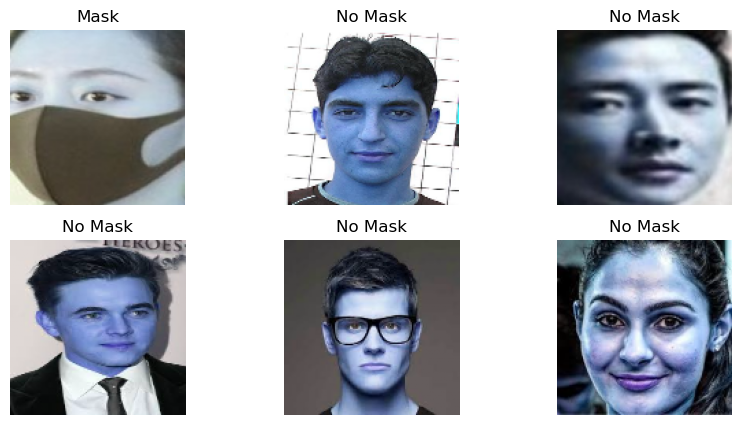

In [5]:
#Verifying data by displaying some images
plt.figure(figsize=(10,5))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(X_train[i])
  plt.title("Mask" if y_train[i]==0 else "No Mask")
  plt.axis("off")

plt.show()

In [29]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


Building the CNN Model  

In [33]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [34]:
history=model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),batch_size=32)


Epoch 1/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.7639 - loss: 0.5047 - val_accuracy: 0.8882 - val_loss: 0.2601
Epoch 2/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 25s 131ms/step - accuracy: 0.8862 - loss: 0.2666 - val_accuracy: 0.9259 - val_loss: 0.1786
Epoch 3/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 25s 132ms/step - accuracy: 0.9159 - loss: 0.2085 - val_accuracy: 0.9404 - val_loss: 0.1647
Epoch 4/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 26s 140ms/step - accuracy: 0.9346 - loss: 0.1663 - val_accuracy: 0.9431 - val_loss: 0.1599
Epoch 5/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 26s 140ms/step - accuracy: 0.9421 - loss: 0.1488 - val_accuracy: 0.9583 - val_loss: 0.1262
Epoch 6/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 27s 143ms/step - accuracy: 0.9627 - loss: 0.1064 - val_accuracy: 0.9543 - val_loss: 0.1356
Epoch 7/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 27s 144ms/step - accuracy: 0.9701 - loss: 0.0794 - val_accuracy: 0.9629 - val_loss: 0.1175
Epoch 8/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 27s 144ms/step - accuracy: 0.9763 - loss: 0

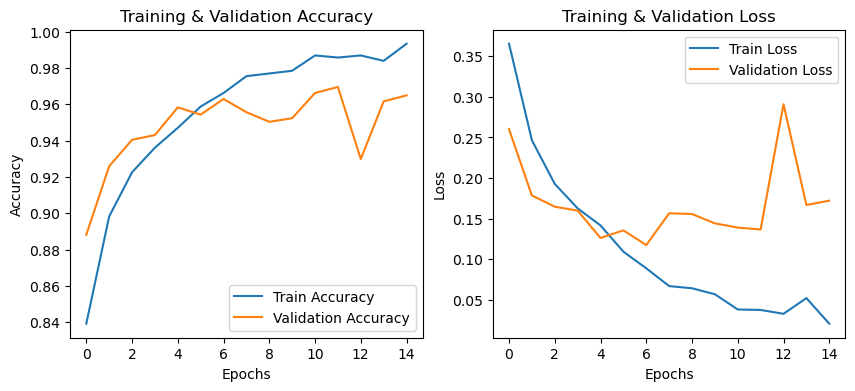

In [35]:
plt.figure(figsize=(10, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()


Evaluating the Model

In [36]:
model.save('face_mask_model.h5')

In [37]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9689 - loss: 0.1619
Test Accuracy: 96.49%


Realtime testing using OpenCV and Webcam

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

#loading the saved model
model=load_model('face_mask_model.h5')

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)  # Open webcam (use '0' for default webcam)

while True:
    ret, frame = cap.read()  # Read frame from webcam
    if not ret:
        break

    # Convert frame to grayscale (for face detection)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]  # Crop face region
        face = cv2.resize(face, (128, 128))  # Resize to match model input
        face = np.expand_dims(face, axis=0)  # Expand dimensions (model expects batch)
        face = face / 255.0  # Normalize pixel values

        # Predict using the model
        prediction = model.predict(face)[0][0]

        # Determine mask status
        if prediction > 0.5:
            label = "No Mask"
            color = (0, 0, 255)  # Red for No Mask
        else:
            label = "Mask"
            color = (0, 255, 0)  # Green for Mask

        # Draw rectangle around face & put label
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    # Show output window
    cv2.imshow("Face Mask Detection", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release camera and close windows
cap.release()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


2025-03-24 14:19:25.452 python[44160:3373701] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-24 14:19:25.452 python[44160:3373701] +[IMKInputSession subclass]: chose IMKInputSession_Modern


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

: 